# Linear Regression with PyTorch
In this section we'll use PyTorch's machine learning model to progressively develop a best-fit line for a given set of data points. Like most linear regression algorithms, we're seeking to minimize the error between our model and the actual data, using a <em>loss function</em> like mean-squared-error.

<img src='../Images/linear-regression-residuals.png' width='400' style="display: inline-block"><br>

Image source: <a href='https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png'>https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png</a>

To start, we'll develop a collection of data points that appear random, but that fit a known linear equation $y = 2x+1$

## Library Imports

In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn

## We will create a column matrix of X values - features

In [94]:
X = torch.linspace(1, 50, 50).reshape(-1, 1)
print(X)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


## Create a "random" array of error values
We want 50 random integer values that collectively cancel each other out.

In [95]:
torch.manual_seed(71) # to get reproducible results
e = torch.randint(-8, 9, size = (50, 1), dtype=torch.float)
print(e.sum()) # it will be zero because randint is from uniform distribution

tensor(0.)


In [96]:
# Let's print the random error values
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

## Create a column matrix of y values
Here we'll set our own parameters of $\mathrm {weight} = 2,\; \mathrm {bias} = 1$, plus the error amount.<br><strong><tt>y</tt></strong> will have the same shape as <strong><tt>X</tt></strong> and <strong><tt>e</tt></strong>

In [97]:
y = 2*X + 1 + e # adding e allows us to enter a little noise
print(y)

tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.],
        [25.],
        [28.],
        [28.],
        [21.],
        [36.],
        [38.],
        [29.],
        [37.],
        [32.],
        [33.],
        [40.],
        [44.],
        [49.],
        [43.],
        [48.],
        [56.],
        [57.],
        [60.],
        [63.],
        [66.],
        [64.],
        [72.],
        [73.],
        [68.],
        [65.],
        [68.],
        [72.],
        [84.],
        [79.],
        [89.],
        [82.],
        [83.],
        [89.],
        [81.],
        [90.],
        [99.],
        [87.],
        [94.],
        [92.],
        [99.]])


## Plot the results
We have to convert tensors to NumPy arrays just for plotting.

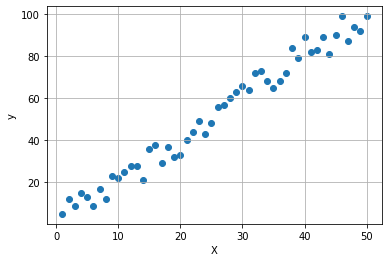

In [98]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('X')
plt.grid(True)

Note that when we created tensor $X$, we did <em>not</em> pass <tt>requires_grad=True</tt>. This means that $y$ doesn't have a gradient function, and <tt>y.backward()</tt> won't work. Since PyTorch is not tracking operations, it doesn't know the relationship between $X$ and $y$.

## Simple linear model
As a quick demonstration we'll show how the built-in <tt>nn.Linear()</tt> model preselects weight and bias values at random.

In [99]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


Without seeing any data, the model sets a random weight of 0.1060 and a bias of 0.9638.

## Model classes
PyTorch lets us define models as object classes that can store multiple model layers. In upcoming sections we'll set up several neural network layers, and determine how each layer should perform its forward pass to the next layer. For now, though, we only need a single <tt>linear</tt> layer. <br><br>

<div class="alert alert-info"><strong>NOTE:</strong> The "Linear" model layer used here doesn't really refer to linear regression. Instead, it describes the type of neural network layer employed. Linear layers are also called "fully connected" or "dense" layers. Going forward our models may contain linear layers, convolutional layers, and more.</div>

In [100]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

When <tt>Model</tt> is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).<br>As above, we can see the initial hyperparameters.

In [101]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)

# Let's see the random weights and bias as decided by torch framework
print(f'Weight - {model.linear.weight.item()}')
print(f'Bias = {model.linear.bias.item()}')

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight - 0.10597813129425049
Bias = 0.9637961387634277


In [102]:
# As models becomes more complex - we can also iterate over all the model parameters
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


<div class="alert alert-info"><strong>NOTE:</strong> In the above example we had our Model class accept arguments for the number of input and output features.<br>For simplicity we can hardcode them into the Model:

<tt><font color=black>
class Model(torch.nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;self.linear = Linear(1,1)<br><br>
model = Model()
</font></tt><br><br>

Alternatively we can use default arguments:

<tt><font color=black>
class Model(torch.nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self, in_dim=1, out_dim=1):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;self.linear = Linear(in_dim,out_dim)<br><br>
model = Model()<br>
<em>\# or</em><br>
model = Model(i,o)</font></tt>
</div>

Now let's see the result when we pass a tensor into the model.

In [103]:
x = torch.tensor([2.0])
print(f"Passing Tensor to the model - {model.forward(x)}") # same as print(model(x))

Passing Tensor to the model - tensor([1.1758], grad_fn=<AddBackward0>)


which is confirmed with $f(x) = (0.1060)(2.0)+(0.9638) = 1.1758$

## Plot the initial model
We can plot the untrained model against our dataset to get an idea of our starting point.

Without setting any loss function, or optimizer function, lets check how the model performs for a variety of values

In [104]:
x1 = np.linspace(0.0, 50.0)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [105]:
# So the prediction will be based on the first random weights and bias without any optimizer function
w1, b1 = model.linear.weight.item(), model.linear.bias.item()
print(f"Initial Random weight - {w1} and bias - {b1}")

Initial Random weight - 0.10597813129425049 and bias - 0.9637961387634277


In [106]:
# So predicted values y for the given values x
y1 = w1*x1 + b1
print(y1)

[0.96379614 1.07193709 1.18007804 1.28821899 1.39635994 1.50450089
 1.61264184 1.72078279 1.82892374 1.93706469 2.04520564 2.15334659
 2.26148754 2.36962849 2.47776944 2.58591039 2.69405134 2.80219229
 2.91033324 3.01847419 3.12661514 3.2347561  3.34289705 3.451038
 3.55917895 3.6673199  3.77546085 3.8836018  3.99174275 4.0998837
 4.20802465 4.3161656  4.42430655 4.5324475  4.64058845 4.7487294
 4.85687035 4.9650113  5.07315225 5.1812932  5.28943415 5.3975751
 5.50571605 5.613857   5.72199795 5.8301389  5.93827985 6.0464208
 6.15456175 6.2627027 ]


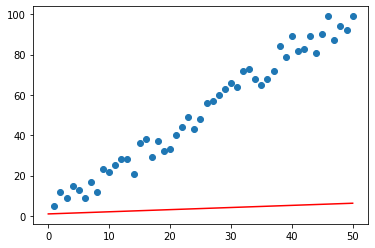

In [107]:
# Now lets do the plotting and see how well it has predicted based on the random weights and bias without any optimizer and loss function
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, 'r')

So we see the model performs very poorly with the random weight and bias ..

## Set the loss function
We could write our own function to apply a Mean Squared Error (MSE) that follows<br>

$\begin{split}MSE &= \frac {1} {n} \sum_{i=1}^n {(y_i - \hat y_i)}^2 \\
&= \frac {1} {n} \sum_{i=1}^n {(y_i - (wx_i + b))}^2\end{split}$<br>

Fortunately PyTorch has it built in.<br>
<em>By convention, you'll see the variable name "criterion" used, but feel free to use something like "linear_loss_func" if that's clearer.</em>

In [108]:
criterion = nn.MSELoss() # Declare the loss function we are going to use

## Set the optimization
Here we'll use <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>Stochastic Gradient Descent</a> (SGD) with an applied <a href='https://en.wikipedia.org/wiki/Learning_rate'>learning rate</a> (lr) of 0.001. Recall that the learning rate tells the optimizer how much to adjust each parameter on the next round of calculations. Too large a step and we run the risk of overshooting the minimum, causing the algorithm to diverge. Too small and it will take a long time to converge.

For more complicated (multivariate) data, you might also consider passing optional <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum'><tt>momentum</tt></a> and <a href='https://en.wikipedia.org/wiki/Tikhonov_regularization'><tt>weight_decay</tt></a> arguments. Momentum allows the algorithm to "roll over" small bumps to avoid local minima that can cause convergence too soon. Weight decay (also called an L2 penalty) applies to biases.

For more information, see <a href='https://pytorch.org/docs/stable/optim.html'><strong><tt>torch.optim</tt></strong></a>

In [109]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

## Train the model
An <em>epoch</em> is a single pass through the entire dataset. We want to pick a sufficiently large number of epochs to reach a plateau close to our known parameters of $\mathrm {weight} = 2,\; \mathrm {bias} = 1$
<br>
<div class="alert alert-info"><strong>Let's walk through the steps we're about to take:</strong><br>

1. Set a reasonably large number of passes<br>
<tt><font color=black>epochs = 50</font></tt><br>
2. Create a list to store loss values. This will let us view our progress afterward.<br>
<tt><font color=black>losses = []</font></tt><br>
<tt><font color=black>for i in range(epochs):</font></tt><br>
3. Bump "i" so that the printed report starts at 1<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;i+=1</font></tt><br>
4. Create a prediction set by running "X" through the current model parameters<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model.forward(X)</font></tt><br>
5. Calculate the loss<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)</font></tt><br>
6. Add the loss value to our tracking list<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;losses.append(loss)</font></tt><br>
7. Print the current line of results<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;print(f'epoch: {i:2} loss: {loss.item():10.8f}')</font></tt><br>
8. Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()</font></tt><br>
9. Now we can backprop<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()</font></tt><br>
10. Finally, we can update the hyperparameters of our model<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()</font></tt>
</div>

In [110]:
epochs = 50 # Number of complete passes on the training data
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item()) # Every loss entry is a tensor, so we just need the value from the same to append in the list
    print(f"Epoch - {i}, loss - {loss.item()}, weight - {model.linear.weight.item()}, bias - {model.linear.bias.item()}")
    optimizer.zero_grad() # gradients accumulate with each new epoch and not prevent compounding, we need to reset the gradient for every new epoch
    loss.backward() # Perform the back propagation
    optimizer.step() # Updates the hyperparameters

Epoch - 1, loss - 3057.216796875, weight - 0.10597813129425049, bias - 0.9637961387634277
Epoch - 2, loss - 1588.5311279296875, weight - 3.334900379180908, bias - 1.0604636669158936
Epoch - 3, loss - 830.2999877929688, weight - 1.0148327350616455, bias - 0.9922628402709961
Epoch - 4, loss - 438.8524169921875, weight - 2.6817996501922607, bias - 1.0425218343734741
Epoch - 5, loss - 236.7615203857422, weight - 1.4840211868286133, bias - 1.0076650381088257
Epoch - 6, loss - 132.4291229248047, weight - 2.3446059226989746, bias - 1.0339646339416504
Epoch - 7, loss - 78.56572723388672, weight - 1.7262253761291504, bias - 1.0163217782974243
Epoch - 8, loss - 50.75775909423828, weight - 2.170504093170166, bias - 1.0302516222000122
Epoch - 9, loss - 36.4012336730957, weight - 1.8512457609176636, bias - 1.0214954614639282
Epoch - 10, loss - 28.989229202270508, weight - 2.0806007385253906, bias - 1.029038906097412
Epoch - 11, loss - 25.162382125854492, weight - 1.9157683849334717, bias - 1.024870

## Plot the loss values
Let's see how loss changed over time

Text(0.5, 0, 'epoch')

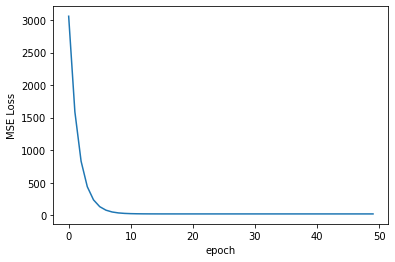

In [115]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE Loss')
plt.xlabel('epoch')

In [112]:
# Lets view the loss values
losses

[3057.216796875,
 1588.5311279296875,
 830.2999877929688,
 438.8524169921875,
 236.7615203857422,
 132.4291229248047,
 78.56572723388672,
 50.75775909423828,
 36.4012336730957,
 28.989229202270508,
 25.162382125854492,
 23.186473846435547,
 22.166126251220703,
 21.639110565185547,
 21.366771697998047,
 21.22591781616211,
 21.15294647216797,
 21.115009307861328,
 21.095176696777344,
 21.084684371948242,
 21.07901382446289,
 21.075830459594727,
 21.073938369750977,
 21.07270050048828,
 21.071819305419922,
 21.07110595703125,
 21.070486068725586,
 21.069913864135742,
 21.069368362426758,
 21.068838119506836,
 21.068307876586914,
 21.067781448364258,
 21.0672607421875,
 21.066740036010742,
 21.066225051879883,
 21.06570816040039,
 21.065187454223633,
 21.064668655395508,
 21.064157485961914,
 21.063636779785156,
 21.063125610351562,
 21.062606811523438,
 21.062095642089844,
 21.06157684326172,
 21.06106948852539,
 21.06055450439453,
 21.060043334960938,
 21.059532165527344,
 21.05901336669

## Plot the result
Now we'll derive <tt>y1</tt> from the new model to plot the most recent best-fit line.

In [113]:
w1, b1 = model.linear.weight.item(), model.linear.bias.item()
print(f"Current weight - {w1} and Current bias - {b1}")

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight - 1.9838191270828247 and Current bias - 1.0557515621185303
[ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 28.57142857 29.59183673
 30.6122449  31.63265306 32.65306122 33.67346939 34.69387755 35.71428571
 36.73469388 37.75510204 38.7755102  39.79591837 40.81632653 41.83673469
 42.85714286 43.87755102 44.89795918 45.91836735 46.93877551 47.95918367
 48.97959184 50.        ]
[  1.05575156   3.08005679   5.10436203   7.12866726   9.15297249
  11.17727772  13.20158295  15.22588818  17.25019342  19.27449865
  21.29880388  23.32310911  25.34741434  27.37171957  29.39602481
  31.42033004  33.44463527  35.4689405   37.49324573  39.51755096
  41.5418562   43.56616143  45.59046666  47.61477189 

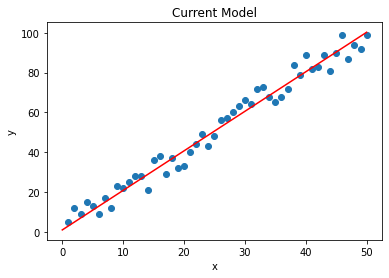

In [114]:
# How does it fare against the original values
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');